In [137]:
using DelimitedFiles
using StatsBase
using HDF5
using Plots; gr();

In [349]:
include("src/seismic.jl")
include("src/inversionModel.jl")
include("src/rejectionModel.jl")

Loading crust information from file resources/crustDistribution.jld


┌ Warning: JLD incorrectly extends FileIO functions (see FileIO documentation)
└ @ FileIO /Users/gailin/.julia/packages/FileIO/AmppF/src/loadsave.jl:210


resultSize (generic function with 3 methods)

In [4]:
ign, h = readdlm("data/remote/base_nobin/bsr_ignmajors_1.csv", ',', header=true);

In [20]:
sio2 = ign[:,2];

In [14]:
indices = Int.(ign[:,1]);

In [22]:
s = sample(indices,3,replace=false)

3-element Array{Int64,1}:
 84748
 22246
 33929

In [58]:
target = [66.6, 63.5, 53.4]
n = 100
samples = zeros(Int, (3,n))
for l in 1:3
    s = sample(indices,n, replace=false)
    snew = zeros(Int, length(s))
    snew .= s
    best = abs(mean(sio2[s]) - target[l])
    while best > 1/20
        to_replace = sample(1:n)
        new = sample(indices)
        snew[to_replace] = new
        if abs(mean(sio2[snew]) - target[l]) < best
            s .= snew
            best = abs(mean(sio2[snew]) - target[l])
            #println("new best $(mean(sio2[snew]))")
        end
        snew .= s # reset
    end
    samples[l,:] .= s
end 

In [60]:
for l in 1:3
    println(mean(sio2[samples[l,:]]))
end
println(target)

66.5938866
63.5182639
53.408159000000005
[66.6, 63.5, 53.4]


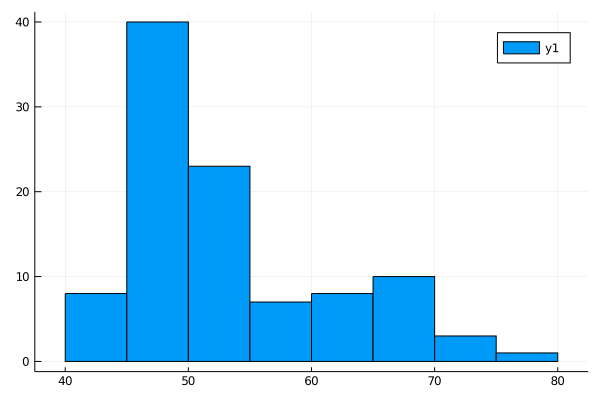

In [57]:
histogram(sio2[samples[3,:]])

In [76]:
include("src/crustDistribution.jl")

Loading crust information from file data/crustDistribution.jld


┌ Warning: JLD incorrectly extends FileIO functions (see FileIO documentation)
└ @ FileIO /Users/gailin/.julia/packages/FileIO/AmppF/src/loadsave.jl:210


Main.crustDistribution

In [126]:
include("src/config.jl")
include("src/parsePerplex.jl")
include("src/seismic.jl")
include("src/cracks.jl")

mu_from_poissons (generic function with 1 method)

In [161]:
include("src/invertData.jl")

getAllSeismic

In [133]:
(rho_c, vp_c, vpvs_c, geotherm) = getPerplexTestSeismic(200, 6, nsamples=20)

Building fake earth100%|████████████████████████████████| Time: 0:01:18


([2855.5014958159013, 2818.9559897808454, 2661.087540674652, 2856.152208699943, 2842.4989733744515, 2642.640661272292, 2571.590030348222, 2650.1077479596365, 2571.838201982075, 2648.910236133259  …  2822.692988489154, 2857.627478911255, 2654.6293856906705, 2692.6764717112937, 2538.9054092219358, 2545.9111822259506, 2570.0127081752526, 2749.3028718869327, 2570.038008824895, 2567.515951805037], [6.46011245552156, 6.239481040994932, 6.122782285791358, 6.46583546455615, 6.3995201591037665, 6.116959926972601, 6.159874819825983, 6.148480192794691, 6.157768235024649, 6.071735161415932  …  6.252539782237402, 6.472070540095417, 6.096110978915393, 6.14027525188778, 5.842251721248062, 5.855250817853771, 6.150113841350604, 6.36922425865001, 6.149375774068068, 6.135809132557407], [1.7602342950326622, 1.7034127056990076, 1.6779655868571228, 1.7576976875713435, 1.7716557369157349, 1.665398511264565, 1.6651275082116685, 1.6653393448925626, 1.6667904160987197, 1.6777661940779214  …  1.7036167685482022,

In [125]:
vp[vp .!= 0 ]

200-element Array{Float64,1}:
 6.108875458615293 
 6.162472211772879 
 6.140408647919409 
 6.215205960782187 
 6.104114722783096 
 6.13391712907787  
 6.139278819181953 
 6.307949459426777 
 6.119159451828468 
 6.123353374346005 
 6.243518337210604 
 5.493286375982216 
 6.116034645885067 
 ⋮                 
 5.995076284723577 
 6.067668974655563 
 5.466829298285775 
 6.318187482885996 
 6.1231986475089535
 6.235118380828192 
 6.11775392660888  
 6.111588741982891 
 6.233589087292647 
 6.242835835641936 
 5.515097366669259 
 6.3267326679206155

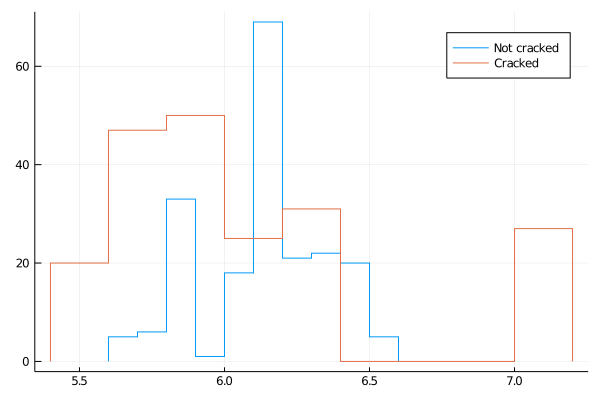

In [134]:
stephist(vp_c, label="Not cracked")
stephist!(vp_noc, label="Cracked")

In [246]:
ign,h = readdlm("data/remote/base/bsr_ignmajors_2.csv", ',', header=true);
seismic = h5read("data/remote/base/perplex_out_2.h5", "results");

In [178]:
f = isnan.(sum(seismic[:,3,:], dims=1))[:];
sum(failed)

321.77899

In [179]:
mean(ign[f,2])

64.77914166850829

In [180]:
mean(ign[.!f,2])

58.62339997981735

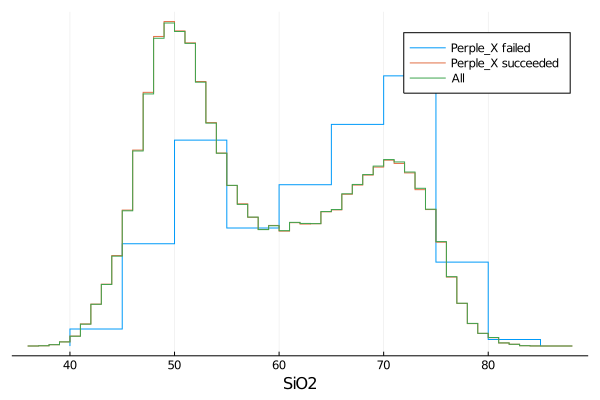

In [247]:
stephist(ign[f,2], label= "Perple_X failed", normalize=:pdf)
stephist!(ign[.!f,2], label="Perple_X succeeded", normalize=:pdf)
stephist!(ign[:,2], label="All", normalize=:pdf, yaxis=false, yticks=false, xlabel="SiO2")
#savefig("../present/perplex_prior.png")

In [159]:
(rho_c, vp_c, vpvs_c, geotherm) = getPerplexTestSeismic(300, 6, nsamples=100)

Building fake earth 12%|███▉                            |  ETA: 0:05:38



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 71.35683 % sio2


Building fake earth 37%|███████████▉                    |  ETA: 0:04:06



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 47.7182 % sio2


Building fake earth 43%|█████████████▊                  |  ETA: 0:03:44



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 78.63651 % sio2


Building fake earth 48%|███████████████▍                |  ETA: 0:03:24



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 71.79254 % sio2


Building fake earth 56%|█████████████████▉              |  ETA: 0:02:55



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 67.64883 % sio2


Building fake earth 73%|███████████████████████▍        |  ETA: 0:01:47



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 73.20645 % sio2


Building fake earth 87%|███████████████████████████▉    |  ETA: 0:00:52



Cannot process sample due to 
 ArgumentError("cannot parse \"-76.81 -15.6713\" as Float64")
failed sample had 64.19476 % sio2


Building fake earth100%|████████████████████████████████| Time: 0:06:40


layer 1 has 100000 failed samples, mean sio2 0.00905


([2666.610749870401, 2607.9404442427603, 2585.3947447787154, 2629.696175215205, 3281.547182992739, 2656.4252153507327, 2614.5107554346064, 2642.7549916023027, 2717.6916902800776, 2717.47047476254  …  2567.446302157013, 2939.6521301826892, 2625.197089498917, 2645.1832003430372, 2619.4089175322174, 2709.6556113677243, 2617.6955372485086, 2640.497042405684, 2814.065725408485, 2799.3783214988916], [6.313919454862607, 5.983735631160196, 5.855471964926809, 6.34586440650694, 7.554881889710479, 6.249219485934911, 5.820689713455626, 6.221083676222452, 6.30309685675154, 6.301313599208761  …  5.819328788674276, 6.2180463532377654, 5.863083466531802, 6.431706138665743, 5.977840220566365, 6.3443767446747765, 5.97386339453464, 6.406311450741865, 6.013407794976585, 6.459632203919829], [1.7682086849510867, 1.5375905284653457, 1.5337025974729481, 1.6494762134372216, 1.7452384628383404, 1.7768538424923874, 1.5944360485167337, 1.6447169345719292, 1.6545639830640528, 1.6547433399319307  …  1.5445429016969

In [203]:
include("src/invertData.jl")

getAllSeismic

In [221]:
(rho_c, vp_c, vpvs_c, geotherm), indices = getPerplexTestSeismic(300, 6, nsamples=100)

Building fake earth  5%|█▋                              |  ETA: 0:06:06



Cannot process sample due to 
 ArgumentError("cannot parse \"-86.89 399.8222\" as Float64")
failed sample had 62.64227 % sio2


Building fake earth 13%|████▏                           |  ETA: 0:05:35



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 71.29341 % sio2


Building fake earth 48%|███████████████▍                |  ETA: 0:03:28



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 68.38233 % sio2


Building fake earth 81%|█████████████████████████▉      |  ETA: 0:01:16



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
failed sample had 52.28337 % sio2


Building fake earth 87%|███████████████████████████▉    |  ETA: 0:00:52



Cannot process sample due to 
 ArgumentError("cannot parse \"-87.11 -23.9446\" as Float64")
failed sample had 66.63344 % sio2


Building fake earth100%|████████████████████████████████| Time: 0:06:44


layer 1 has 5 failed samples, mean sio2 64.24696399999999


(([2650.9729767527706, 2717.107687734813, 2512.776078241878, 2680.7134017804583, 2747.578458130271, 2797.0533892362764, 2756.5197896177838, 2656.268238204625, 2777.1019909824577, 2525.3738771622293  …  2568.19649639991, 3114.815071360341, 3103.04629691662, 3355.809960004539, 2685.5376737854635, 2718.2516023412154, 2720.614585974938, 2613.8076317216633, 2846.3927707041207, 2745.549270739824], [5.72173607823196, 6.1920525651959, 5.397529862700976, 5.418712014943795, 6.435842195735368, 6.229267580189721, 5.692461518338837, 5.732866569973642, 5.509648333719143, 5.713290605486562  …  5.613814846865509, 6.624249015966114, 6.5731900125710165, 7.245891196924116, 5.7069842276433675, 5.797282052855567, 6.038177427746804, 6.0771034124436945, 6.381091859038385, 5.979052583032409], [1.5471422146378204, 1.6639407082519193, 1.4313412198177369, 1.472760877920416, 1.6679078913931473, 1.5614994668457518, 1.6379355182578066, 1.546638014402553, 1.5442800485641828, 1.5013962846750075  …  1.5137646022702893

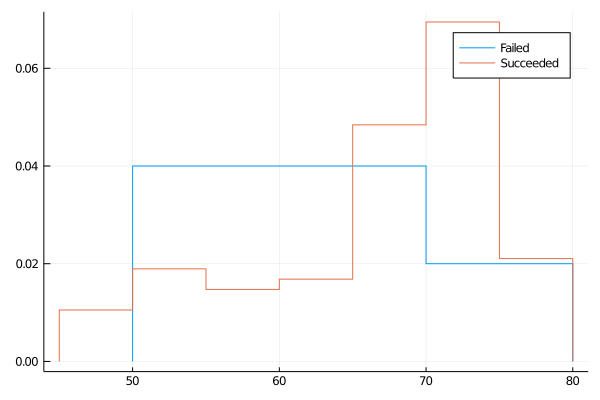

In [185]:
stephist(failed, normalize=:pdf, label="Failed")
stephist!(succeeded, normalize=:pdf, label="Succeeded")

In [575]:
# error distribution 
dat, header = readdlm("data/adjustedPerplexRes.csv", ',', header=true);
header = header[:]

# No eclogites plz 
eclogites = [9,10,11,14,16,19]
filter = [! (s in eclogites) for s in dat[:,1]]
dat = dat[filter, :]

# Interested in non-nan differences between actual and Perplex data 
ers = fill(NaN, (size(dat)[1],3));
ers[:,2] .= dat[:,findfirst(isequal("perplex vp"), header)] .- dat[:,findfirst(isequal("dabie vp"), header)]
ers[:,3] .= dat[:,findfirst(isequal("perplex vp/vs"), header)] .- dat[:,findfirst(isequal("dabie vp/vs"), header)]
ers[:,1] .= dat[:,findfirst(isequal("perplex rho"), header)] .- (1000 .* dat[:,findfirst(isequal("dabie rho"), header)]);
ers = ers[.!(isnan.(sum(ers, dims=2)))[:],:]; 
N_er = fit(MvNormal, ers')

# Bias may be caused by cracks, deformation caused by transport to surface -- we don't want it. 
zero_mean = MvNormal(zeros(3), N_er.Σ)

FullNormal(
dim: 3
μ: [0.0, 0.0, 0.0]
Σ: [6521.7627999630495 1.7273183724489563 -0.07154611347706762; 1.7273183724489563 0.07772477283590881 0.0021935233133172187; -0.07154611347706762 0.0021935233133172187 0.0021507496031949046]
)


In [577]:
cor(ers)

3×3 Array{Float64,2}:
  1.0        0.0767203  -0.0191033
  0.0767203  1.0         0.169655 
 -0.0191033  0.169655    1.0      

# Individual sample inversion

In [519]:
ign,h = readdlm("data/remote/base/bsr_ignmajors_2.csv", ',', header=true);
seismic = h5read("data/remote/base/perplex_out_2.h5", "results");

In [629]:
### Configure sample, using sample 5 and geotherm bin 2
bins = crustDistribution.binBoundaries(10)
ok = (crustDistribution.depth[:,1] .> bins[2]) .& (crustDistribution.depth[:,1] .< bins[3])
depths = crustDistribution.depth[ok,:][sample(1:sum(ok)),:]

sdepth = (depths[2] + depths[3])/2 + depths[2] # middle crust 
dtdz = 550.0/depths[1]

formation_depth, formation_dtdz = crustDistribution.getFormationParams(sdepth, dtdz)

comp = zeros(10)
target = 71
while abs(comp[1] - target ) > .1
    comp = ign[sample(1:size(ign,1)),2:11]
    si = comp[1]
end

println("Formation depth $formation_depth, formation temp $(formation_depth*formation_dtdz), sio2 $(comp[1])")

Formation depth 53.635823412615935, formation temp 667.3424338690991, sio2 71.05085


In [630]:
st = SeismicTransform()

geotherm = formation_dtdz/dpdz # dt/dp 
P_range = [formation_depth*(9/10)*dpdz, formation_depth*(11/10)*dpdz] # we only need a small range around formation t, p

# Run perplex
perplex_configure_geotherm(DEFAULT_PERPLEX, DEFAULT_SCRATCH, comp, PERPLEX_COMPOSITION_ELTS,
    P_range, 273.15, geotherm, dataset="hpha11ver.dat", solution_phases=SOLUTIONS,
    excludes=FLUID_ENDMEMBERS, index=111, npoints=NPOINTS)
point = perplex_query_point(DEFAULT_PERPLEX, DEFAULT_SCRATCH, formation_depth*dpdz, index=111)

# Adjust T, P 
properties = get_system_props(point)
endmembers = parse_perplex_point(point)

P = dpdz*sdepth + 280 # add surface pressure (bar)
T = dtdz*sdepth + 273.15 # add surface temp (K)
rho, vp, vs = get_seismic(T, P, properties, endmembers, st)
println(rho, vp, vp/vs)

2444.20217025284465.9277463032694311.5661323510047727


In [631]:
println("\$\\rho = $rho\$, \$V_p = $vp\$, \$V_p/V_s = $(vp/vs)\$")

$\rho = 2444.2021702528446$, $V_p = 5.927746303269431$, $V_p/V_s = 1.5661323510047727$


In [559]:
model = RejectionModel(ign, Array(seismic[:,3,:]'));

In [560]:
n = 10000
#res = zeros((n,3))
res = estimateComposition(model, repeat([rho], n), repeat([vp], n), repeat([vp ./ vs], n))[1];

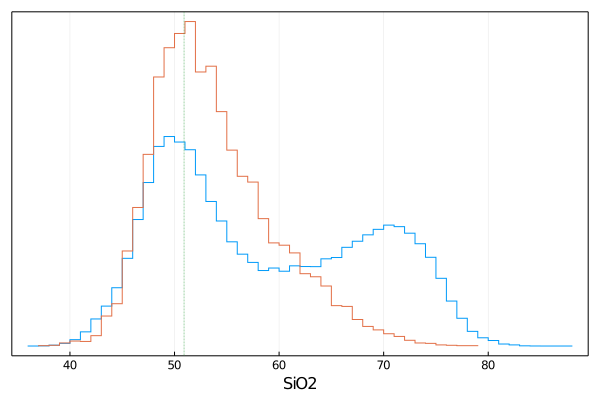

In [563]:
stephist(ign[:,2], label="Prior", normalize=:pdf)
stephist!(res[:,2], label="Posterior", normalize=:pdf)
vline!([comp[1]], linestyle=:dot, label="Sample composition", xaxis="SiO2", yticks=false, framestyle=:box, legend=false)
#savefig("thesis/viz/mafic_posterior.png")

In [498]:
ign

100000×58 Array{Float64,2}:
      1.0  NaN  NaN  NaN  NaN  NaN  NaN  …  12.5956   22.9793  36.3843  0.0
      2.0  NaN  NaN  NaN  NaN  NaN  NaN     11.4727   18.9153  28.9608  0.0
      3.0  NaN  NaN  NaN  NaN  NaN  NaN     10.7174   21.7599  30.2659  0.0
      4.0  NaN  NaN  NaN  NaN  NaN  NaN     13.2381   27.0145  40.9827  0.0
      5.0  NaN  NaN  NaN  NaN  NaN  NaN     15.3666   26.3775  38.674   0.0
      6.0  NaN  NaN  NaN  NaN  NaN  NaN  …  12.9611   23.8654  35.5346  0.0
      7.0  NaN  NaN  NaN  NaN  NaN  NaN     23.2907   32.9961  36.8792  0.0
      8.0  NaN  NaN  NaN  NaN  NaN  NaN     15.9837   27.804   37.4632  0.0
      9.0  NaN  NaN  NaN  NaN  NaN  NaN     13.7765   26.2367  34.1862  0.0
     10.0  NaN  NaN  NaN  NaN  NaN  NaN     18.9993   37.061   45.0702  0.0
     11.0  NaN  NaN  NaN  NaN  NaN  NaN  …  12.5863   23.9808  36.4935  0.0
     12.0  NaN  NaN  NaN  NaN  NaN  NaN     15.5275   25.0965  37.946   0.0
     13.0  NaN  NaN  NaN  NaN  NaN  NaN     13.2057   24.953

In [569]:
nOriginal()

22530